# **Importing Libraries and Dataset**

In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import ADASYN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score, classification_report

In [337]:
df = pd.read_excel('loan_data_set.xlsx')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# **Data Exploration**

In [338]:
df.shape

(614, 13)

In [339]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [340]:
df.duplicated().sum()

0

In [341]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [342]:
df.dropna(inplace=True)
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [344]:
df.drop(labels = ['Loan_ID'], axis = 1, inplace = True)

In [345]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0


In [346]:
df['Credit_History'] = df['Credit_History'].astype(object)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype(object)

print(df['Credit_History'].dtypes)
print(df['Loan_Amount_Term'].dtypes)

object
object


In [347]:
df[['ApplicantIncome', 'CoapplicantIncome', 'TotalIncome', 'LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,TotalIncome,LoanAmount
count,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,6945.324833,144.735417
std,5668.251251,2617.692267,5969.948374,80.508164
min,150.000000,0.000000,1442.000000,9.000000
25%,2898.750000,0.000000,4148.000000,100.000000
50%,3859.000000,1084.500000,5422.500000,128.000000
75%,5852.500000,2253.250000,7672.500000,170.000000
max,81000.000000,33837.000000,81000.000000,600.000000


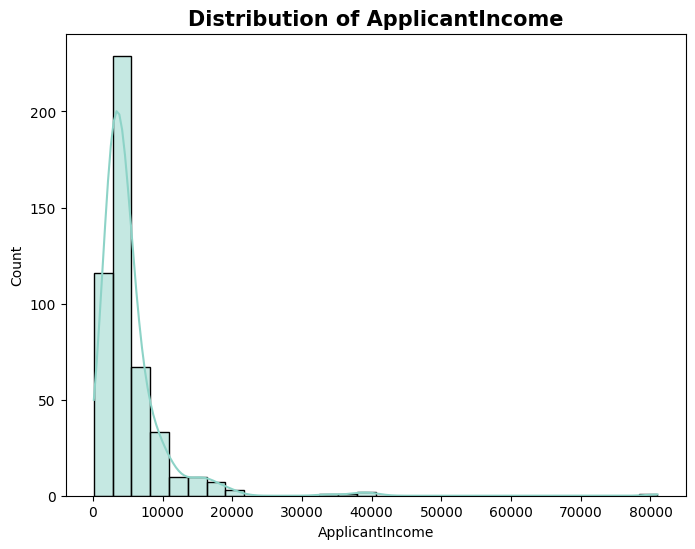

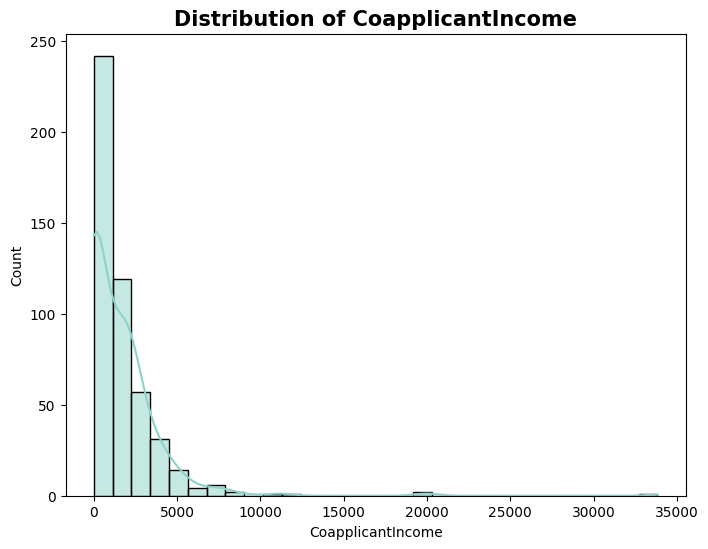

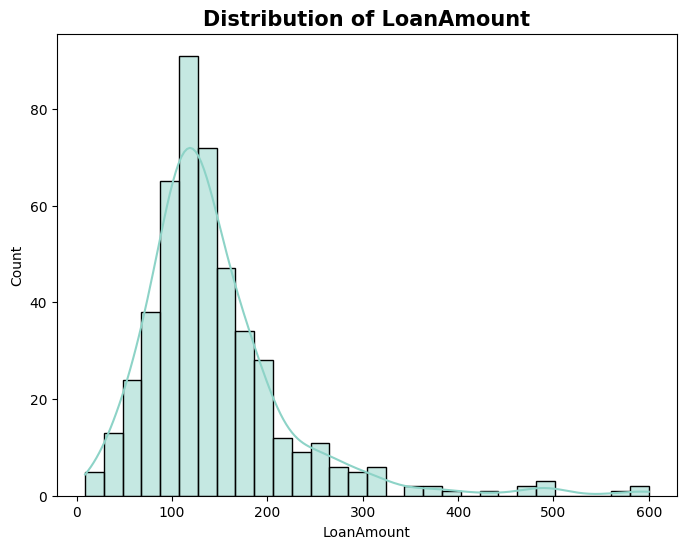

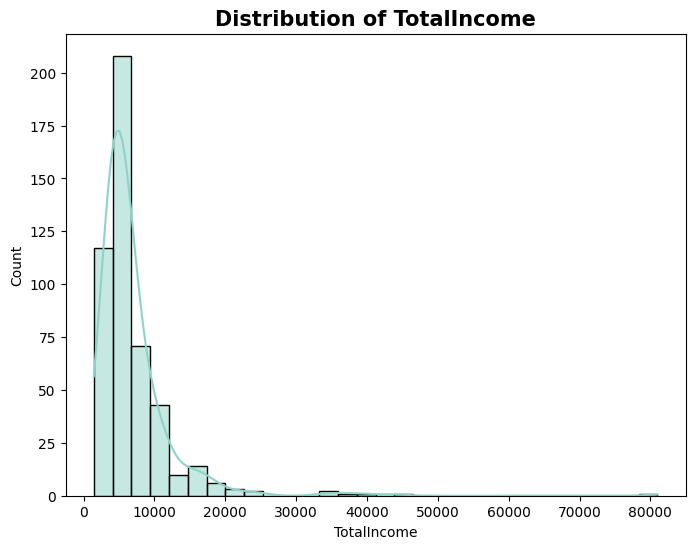

In [348]:
con_feas = df.select_dtypes(include=[int, float])

for feature in con_feas:
    plt.figure(figsize=(8,6))
    sns.histplot(data=df, x=feature, kde=True, bins=30)
    print()

    plt.title(f'Distribution of {feature}', fontsize=15, weight='bold')
    plt.show()


In [349]:
df_categories = df.select_dtypes(include=[object])

for col in df_categories.columns:
    print(df[col].value_counts())
    print()


Gender
Male      394
Female     86
Name: count, dtype: int64

Married
Yes    311
No     169
Name: count, dtype: int64

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

Education
Graduate        383
Not Graduate     97
Name: count, dtype: int64

Self_Employed
No     414
Yes     66
Name: count, dtype: int64

Loan_Amount_Term
360.0    411
180.0     36
480.0     12
300.0      9
120.0      3
84.0       3
60.0       2
240.0      2
36.0       2
Name: count, dtype: int64

Credit_History
1.0    410
0.0     70
Name: count, dtype: int64

Property_Area
Semiurban    191
Urban        150
Rural        139
Name: count, dtype: int64

Loan_Status
Y    332
N    148
Name: count, dtype: int64



<ipython-input-350-eeafe82ab3e7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='Set3')


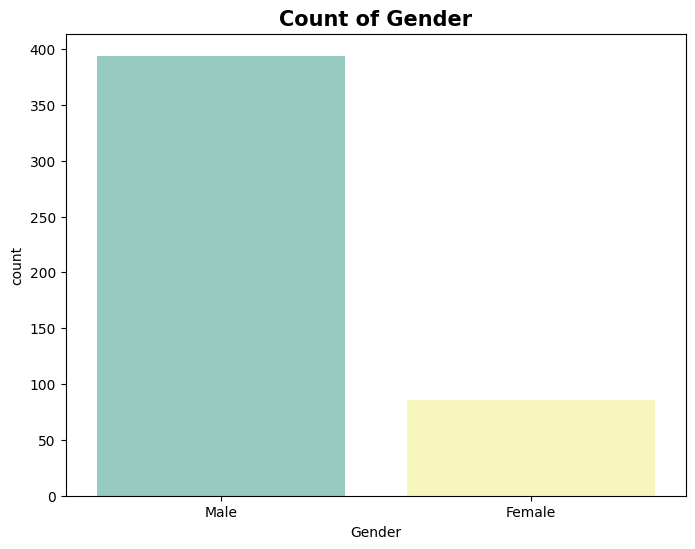

<ipython-input-350-eeafe82ab3e7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='Set3')


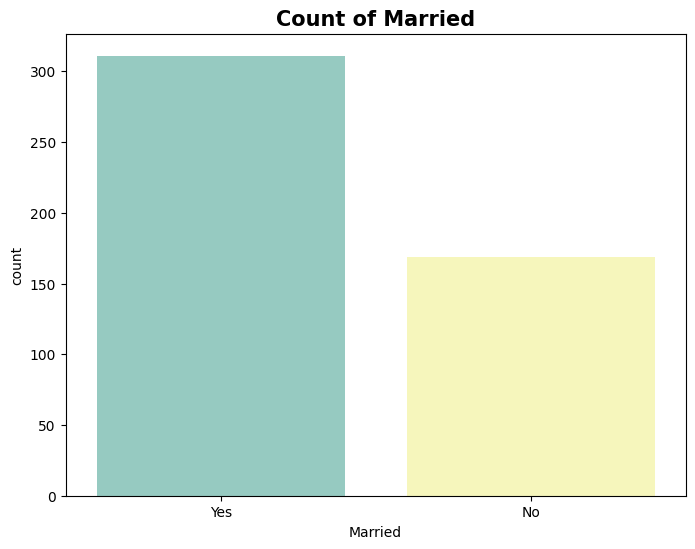

<ipython-input-350-eeafe82ab3e7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='Set3')


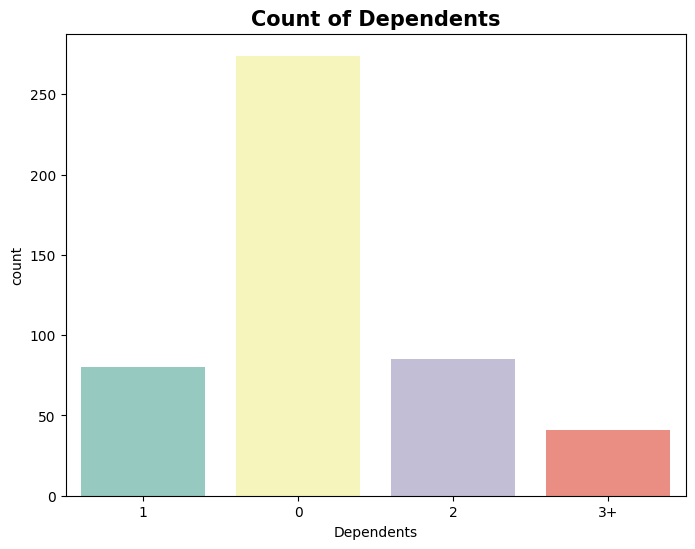

<ipython-input-350-eeafe82ab3e7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='Set3')


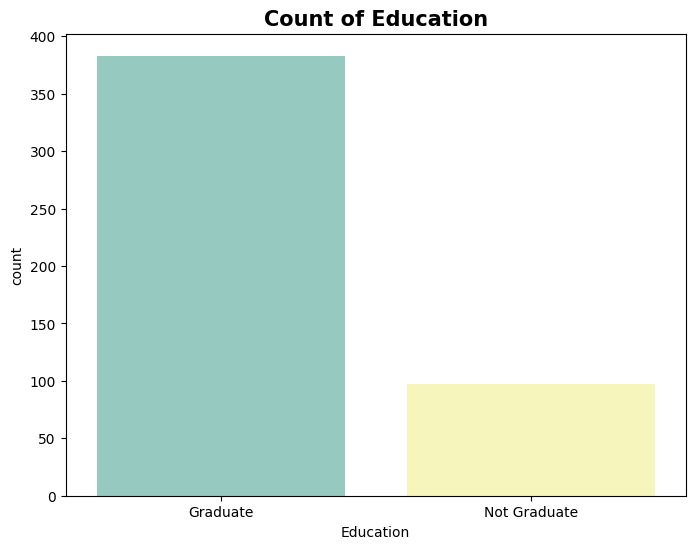

<ipython-input-350-eeafe82ab3e7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='Set3')


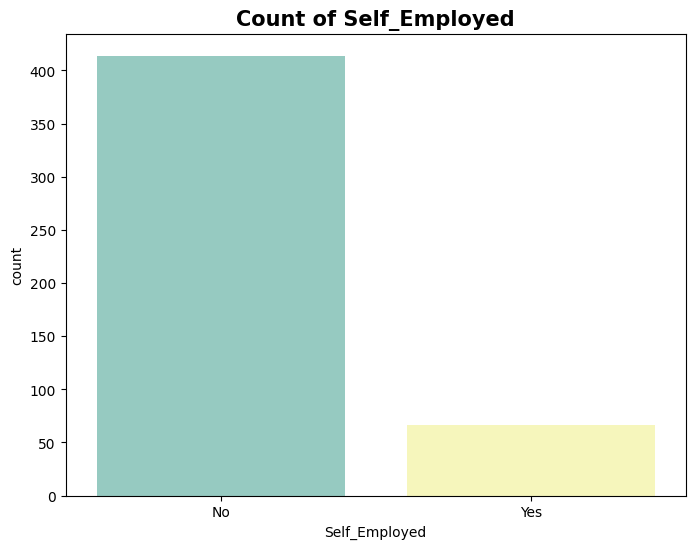

<ipython-input-350-eeafe82ab3e7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='Set3')


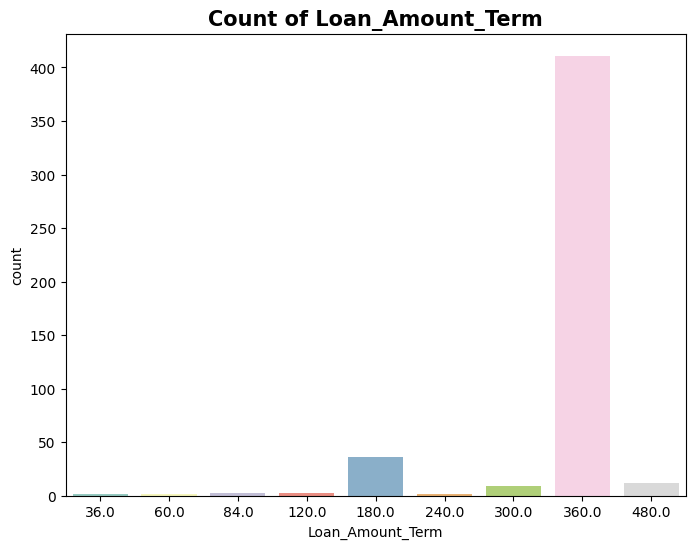

<ipython-input-350-eeafe82ab3e7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='Set3')


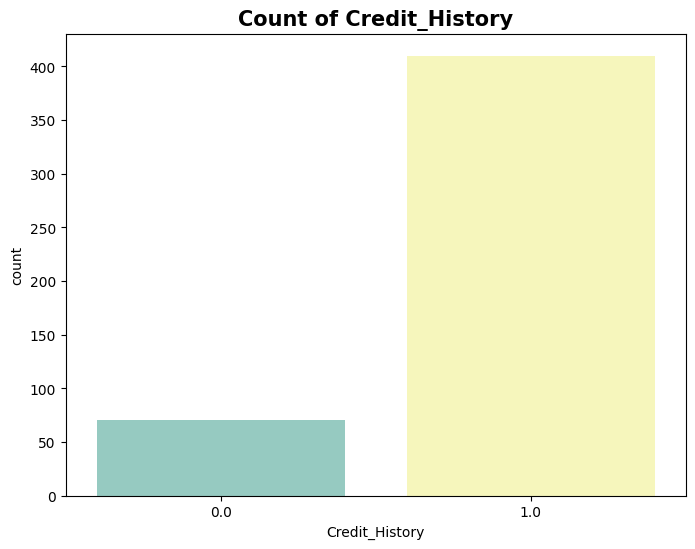

<ipython-input-350-eeafe82ab3e7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='Set3')


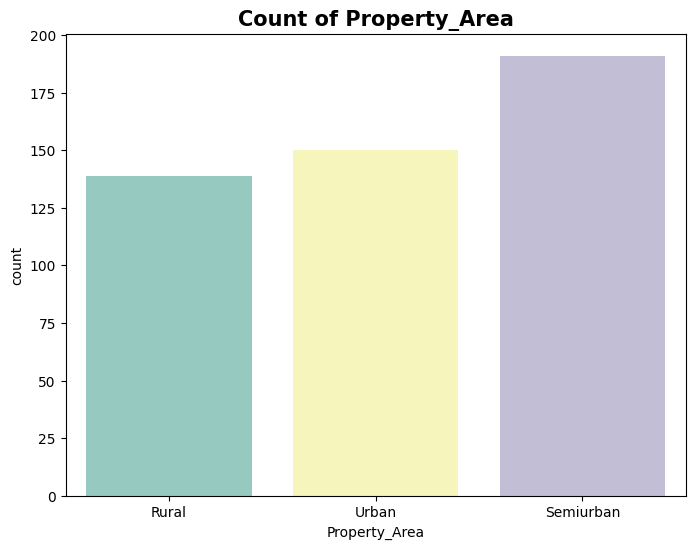

<ipython-input-350-eeafe82ab3e7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='Set3')


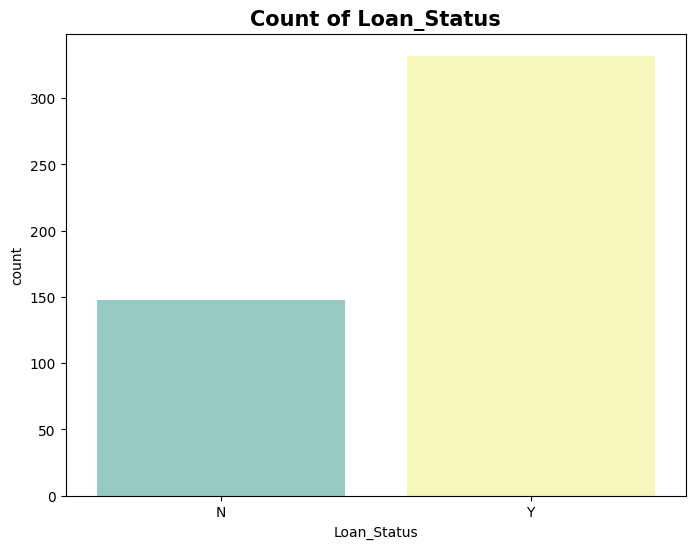

In [350]:
cate_feas = df.select_dtypes(include=[object])

for feature in cate_feas:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=feature, palette='Set3')
    print()

    plt.title(f'Count of {feature}', fontsize=15, weight='bold')
    plt.show()


<Axes: >

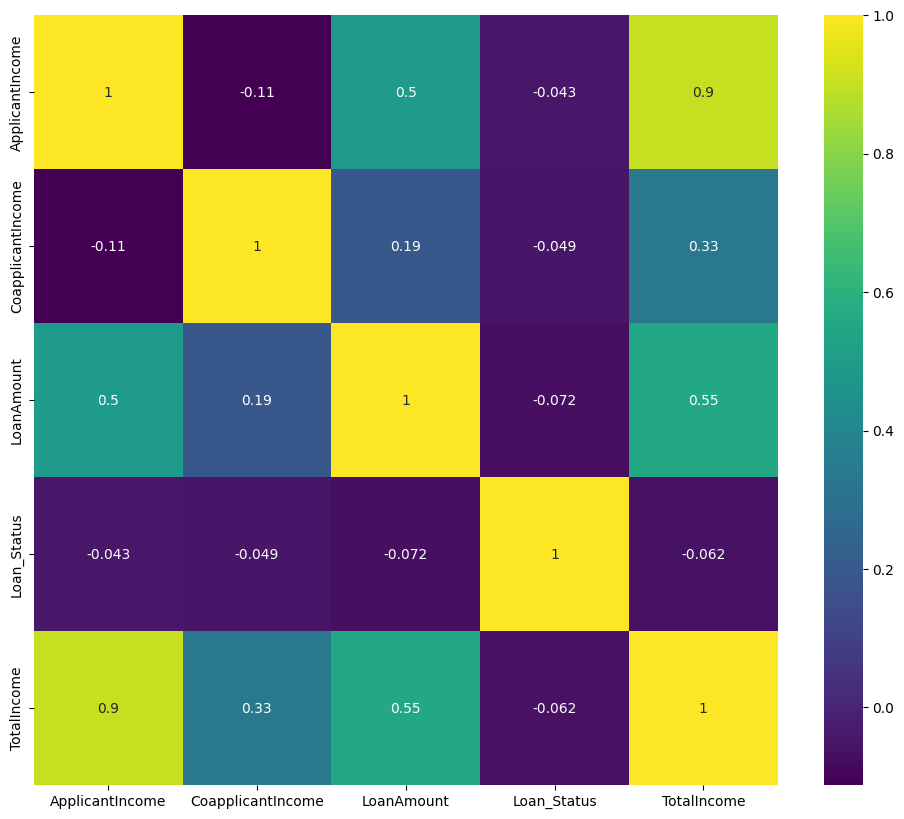

In [351]:
df_copy = df.copy()
df_copy['Loan_Status'] = df_copy['Loan_Status'].map({'N': 0, 'Y': 1})

df_numeric = df_copy.select_dtypes(include=[int, float])
corr = df_numeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='viridis')

# **One Hot Encoding**

In [352]:
cate_dummies = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']

data_onehot = pd.get_dummies(df, columns=cate_dummies).astype(int, errors='ignore')
data_onehot


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,TotalIncome,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,4583,1508,128,N,6091,0,1,0,1,0,...,0,0,0,1,0,0,1,1,0,0
2,3000,0,66,Y,3000,0,1,0,1,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358,120,Y,4941,0,1,0,1,1,...,0,0,0,1,0,0,1,0,0,1
4,6000,0,141,Y,6000,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,1
5,5417,4196,267,Y,9613,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0,71,Y,2900,1,0,1,0,1,...,0,0,0,1,0,0,1,1,0,0
610,4106,0,40,Y,4106,0,1,0,1,0,...,1,0,0,0,0,0,1,1,0,0
611,8072,240,253,Y,8312,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
612,7583,0,187,Y,7583,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1


In [353]:
data_onehot.rename(columns = {'Gender_Female':'Female','Gender_Male':'Male','Dependents_3+': 'Dependents_3_or_more',
                              'Loan_Amount_Term_36.0': 'Loan_Amount_Term_36','Loan_Amount_Term_60.0': 'Loan_Amount_Term_60',
                              'Loan_Amount_Term_84.0': 'Loan_Amount_Term_84','Loan_Amount_Term_120.0': 'Loan_Amount_Term_120',
                              'Loan_Amount_Term_180.0': 'Loan_Amount_Term_180','Loan_Amount_Term_240.0': 'Loan_Amount_240',
                              'Loan_Amount_Term_300.0': 'Loan_Amount_Term_300','Loan_Amount_Term_360.0': 'Loan_Amount_Term_360',
                              'Loan_Amount_Term_480.0': 'Loan_Amount_Term_480','Credit_History_0.0': 'Credit_History_No',
                              'Credit_History_1.0': 'Credit_History_Yes'},inplace = True)
data_onehot

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,TotalIncome,Female,Male,Married_No,Married_Yes,Dependents_0,...,Loan_Amount_Term_180,Loan_Amount_240,Loan_Amount_Term_300,Loan_Amount_Term_360,Loan_Amount_Term_480,Credit_History_No,Credit_History_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,4583,1508,128,N,6091,0,1,0,1,0,...,0,0,0,1,0,0,1,1,0,0
2,3000,0,66,Y,3000,0,1,0,1,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358,120,Y,4941,0,1,0,1,1,...,0,0,0,1,0,0,1,0,0,1
4,6000,0,141,Y,6000,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,1
5,5417,4196,267,Y,9613,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0,71,Y,2900,1,0,1,0,1,...,0,0,0,1,0,0,1,1,0,0
610,4106,0,40,Y,4106,0,1,0,1,0,...,1,0,0,0,0,0,1,1,0,0
611,8072,240,253,Y,8312,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
612,7583,0,187,Y,7583,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1


# **Split train and test**

In [354]:
X = data_onehot.drop(columns = ['Loan_Status'])
y = data_onehot['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# **Imbalance Technique**

In [355]:
X_train, y_train = ADASYN(random_state=0).fit_resample(X_train, y_train)

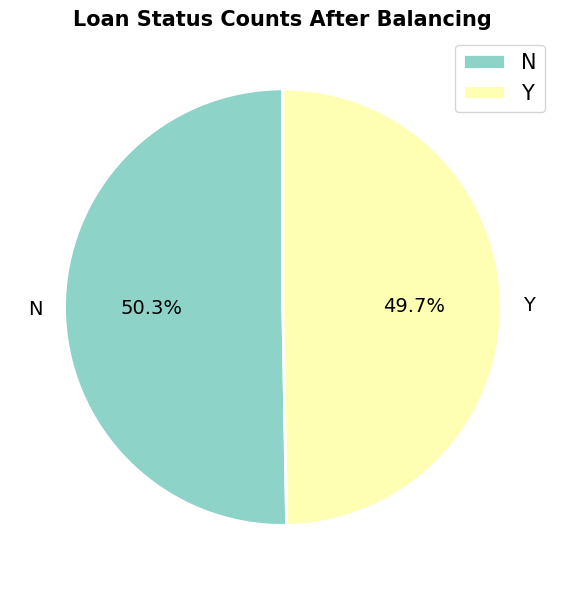

In [356]:
value_counts = pd.Series(y_train).value_counts()

plt.figure(figsize=(10, 6))
plt.pie(value_counts, labels=value_counts.index, colors=sns.set_palette('Set3'), autopct='%1.1f%%',
        textprops={'fontsize': 14}, startangle=90, wedgeprops={'edgecolor': 'white', 'linewidth': 2})

plt.title('Loan Status Counts After Balancing', fontsize=15, weight='bold')
plt.legend(bbox_to_anchor=(1, 1), prop={'size': 15})
plt.tight_layout()

plt.show()


# **Standard Scaler**

In [357]:
num_cols = df.select_dtypes(include=[int, float]).columns

scaler = StandardScaler()
scaler.fit(X_train[num_cols])

X_train[num_cols] = scaler.transform(X_train[num_cols])
X_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,TotalIncome,Female,Male,Married_No,Married_Yes,Dependents_0,Dependents_1,...,Loan_Amount_Term_180,Loan_Amount_240,Loan_Amount_Term_300,Loan_Amount_Term_360,Loan_Amount_Term_480,Credit_History_No,Credit_History_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,-0.525650,-0.616020,-0.432787,-0.829932,0,1,0,1,0,0,...,0,0,0,1,0,0,1,1,0,0
1,-0.703044,-0.616020,-1.248522,-0.988059,1,0,1,0,1,0,...,0,0,0,1,0,0,1,1,0,0
2,-0.136967,-0.616020,-0.164934,-0.483462,1,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,-0.528619,-0.616020,1.296083,-0.832578,1,0,1,0,0,0,...,0,0,0,1,0,0,1,1,0,0
4,1.466257,-0.616020,-0.152759,0.945642,0,1,0,1,1,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-0.766876,0.615269,0.370772,-0.322467,0,0,0,1,1,0,...,0,0,0,1,0,1,0,0,1,0
541,-0.786422,0.506991,-0.274510,-0.403626,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
542,-0.780978,0.526917,-0.140584,-0.386865,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
543,1.246556,-0.616020,0.553399,0.749802,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [358]:
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_test

,ApplicantIncome,CoapplicantIncome,LoanAmount,TotalIncome,Female,Male,Married_No,Married_Yes,Dependents_0,Dependents_1,...,Loan_Amount_Term_180,Loan_Amount_240,Loan_Amount_Term_300,Loan_Amount_Term_360,Loan_Amount_Term_480,Credit_History_No,Credit_History_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
18,-0.082289,-0.616020,-0.189284,-0.434723,0,1,0,1,1,0,...,0,0,0,1,0,0,1,1,0,0
161,0.671325,-0.616020,1.539586,0.237044,0,1,0,1,1,0,...,0,0,0,1,0,0,1,0,0,1
182,-0.153296,-0.616020,-0.919793,-0.498018,0,1,0,1,1,0,...,1,0,0,0,0,0,1,0,1,0
340,-0.636490,-0.019362,0.297721,-0.578736,0,1,0,1,0,0,...,0,0,0,1,0,0,1,1,0,0
216,-1.254276,0.060719,-0.164934,-1.082451,0,1,0,1,1,0,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,-0.403676,-0.616020,-0.469313,-0.721205,0,1,1,0,0,0,...,0,0,0,1,0,1,0,1,0,0
534,3.202836,-0.616020,-0.286686,2.493617,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
142,0.428120,-0.616020,0.322072,0.020253,0,1,1,0,1,0,...,1,0,0,0,0,0,1,0,1,0
591,0.193079,-0.616020,0.687326,-0.189261,0,1,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0


# **K-nearest neighbors**

In [359]:
knn_parameters = {
    'n_neighbors': list(range(1,10)),
    'weights': ['uniform', 'distance']}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_parameters, cv=5, scoring='accuracy')
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [360]:
print('Best parameters : ',knn_cv.best_params_)
print(f'Train accuracy: {knn_cv.best_score_:.3f}')
print(f'Test accuracy: {knn_cv.score(X_test, y_test):.3f}')

Best parameters :  {'n_neighbors': 4, 'weights': 'distance'}
Train accuracy: 0.840
Test accuracy: 0.698


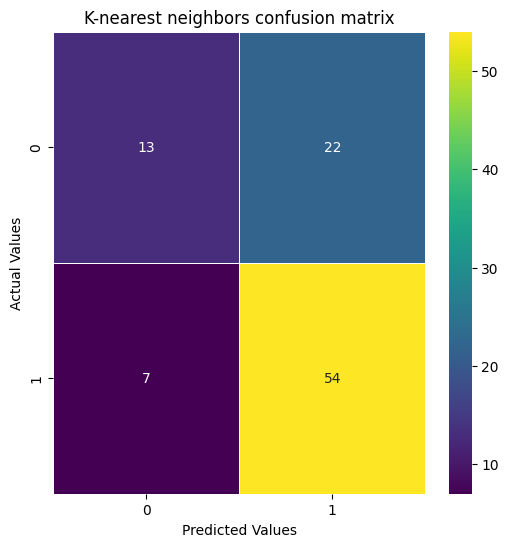

In [361]:
knn_y_pred = knn_cv.predict(X_test)
knn_y_true = y_test
knn_cm = confusion_matrix(knn_y_true, knn_y_pred)

f, ax =plt.subplots(figsize = (6,6))

sns.heatmap(knn_cm,annot = True, linewidths= 0.5, ax=ax, cmap='viridis')
plt.title('K-nearest neighbors confusion matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [362]:
print(classification_report(knn_y_true,knn_y_pred))

              precision    recall  f1-score   support

           N       0.65      0.37      0.47        35
           Y       0.71      0.89      0.79        61

    accuracy                           0.70        96
   macro avg       0.68      0.63      0.63        96
weighted avg       0.69      0.70      0.67        96



# **LogisticRegression**

In [363]:
lr_parameters = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10]}
lr = LogisticRegression(solver='liblinear', random_state=1)
lr_cv = GridSearchCV(lr, lr_parameters, cv=5, scoring='accuracy')
lr_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=1, solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [364]:
print('Best parameters : ',lr_cv.best_params_)
print(f'Train accuracy: {lr_cv.best_score_:.3f}')
print(f'Test accuracy: {lr_cv.score(X_test, y_test):.3f}')

Best parameters :  {'C': 10, 'penalty': 'l1'}
Train accuracy: 0.857
Test accuracy: 0.802


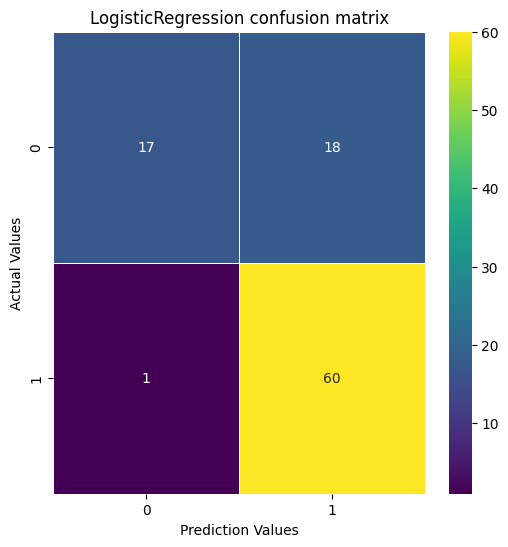

In [365]:
lr_y_pred = lr_cv.predict(X_test)
lr_y_true = y_test
lr_cm = confusion_matrix(lr_y_true , lr_y_pred)

f, ax =plt.subplots(figsize = (6,6))

sns.heatmap(lr_cm,annot = True, linewidths= 0.5, ax=ax, cmap='viridis')
plt.title('LogisticRegression confusion matrix')
plt.xlabel('Prediction Values')
plt.ylabel('Actual Values')
plt.show()



In [366]:
print(classification_report(lr_y_true,lr_y_pred))

              precision    recall  f1-score   support

           N       0.94      0.49      0.64        35
           Y       0.77      0.98      0.86        61

    accuracy                           0.80        96
   macro avg       0.86      0.73      0.75        96
weighted avg       0.83      0.80      0.78        96



# **Decision Tree**

In [367]:
tree_parameters = {'criterion': ['gini', 'entropy'],
     'max_depth': [5, 10, 20, 30,],
     'max_features': ['auto', 'sqrt', 'log2']}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, tree_parameters, cv=5, scoring='accuracy')
tree_cv.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='accuracy')

In [368]:
print('Best parameters : ',tree_cv.best_params_)
print(f'Train accuracy: {tree_cv.best_score_:.3f}')
print(f'Test accuracy: {tree_cv.score(X_test,y_test):.3f}')

Best parameters :  {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2'}
Train accuracy: 0.802
Test accuracy: 0.698


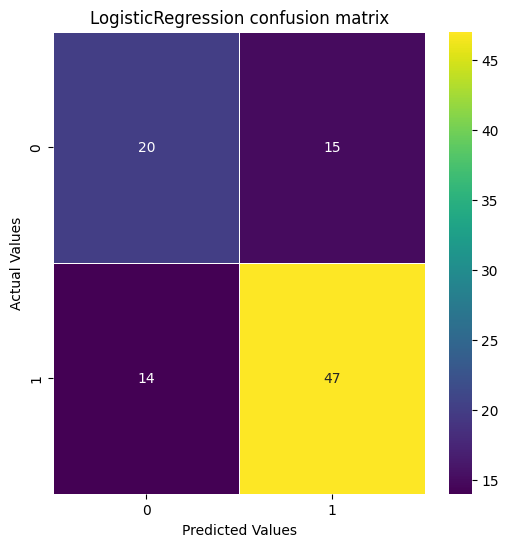

In [369]:
tree_y_pred = tree_cv.predict(X_test)
tree_y_true = y_test
tree_cm = confusion_matrix(tree_y_true, tree_y_pred)

f, ax =plt.subplots(figsize = (6,6))

sns.heatmap(tree_cm,annot = True, linewidths=0.5, ax=ax, cmap='viridis')
plt.title('LogisticRegression confusion matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


In [370]:
print(classification_report(tree_y_true,tree_y_pred))

              precision    recall  f1-score   support

           N       0.59      0.57      0.58        35
           Y       0.76      0.77      0.76        61

    accuracy                           0.70        96
   macro avg       0.67      0.67      0.67        96
weighted avg       0.70      0.70      0.70        96



# **Model Performance Comparison**

In [371]:
d1 = {'Model': ['K-nearest neighbors', 'Logistic Regression','Decision Tree'],
    'Test Accuracy': [knn_cv.score(X_test,y_test), lr_cv.score(X_test,y_test), tree_cv.score(X_test,y_test)],
    'F1 score': [f1_score(knn_y_true, knn_y_pred, pos_label='Y'), f1_score(lr_y_true, lr_y_pred, pos_label='Y'), f1_score(tree_y_true ,tree_y_pred, pos_label='Y')]}

model_perf = pd.DataFrame(data=d1)
model_perf.set_index('Model', inplace=True)
model_perf = model_perf.round(3)
model_perf.sort_values('F1 score', ascending=False)


,Test Accuracy,F1 score
Model,,
Logistic Regression,0.802,0.863
K-nearest neighbors,0.698,0.788
Decision Tree,0.698,0.764


จากทั้งสามโมเดล โมเดลที่มีประสิทธิภาพดีที่สุดคือ Logistic Regression ซึ่งมีค่า F1 score สูงสุดอยู่ที่ 0.863 และค่า Test Accuracy สูงสุดอยู่ที่ 0.802 เมื่อเทียบกับ K-nearest neighbors และ Decision Tree ดังนั้น Logistic Regression จึงเป็นโมเดลที่ดีที่สุด